In [40]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

In [34]:
possum = pd.read_csv("data/possum.csv", na_values = "null")
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     104 non-null    int64  
 1   pop      104 non-null    object 
 2   sex      104 non-null    object 
 3   age      102 non-null    float64
 4   head_l   104 non-null    float64
 5   skull_w  104 non-null    float64
 6   total_l  104 non-null    float64
 7   tail_l   104 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ KB


Text(0, 0.5, 'Head Length (mm)')

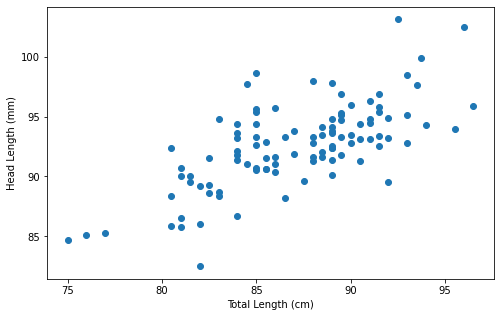

In [35]:
possum1 = possum[["total_l","head_l"]]
total_l = np.array(possum["total_l"])
head_l = np.array(possum["head_l"])
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(total_l,head_l)
ax.set_xlabel("Total Length (cm)")
ax.set_ylabel("Head Length (mm)")

In [36]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

b0 = estimate_coef(total_l,head_l)[0]
b1 = estimate_coef(total_l,head_l)[1]
eq = f"y = {b0:.1f}+{b1:.2f}x"
eq

'y = 42.7+0.57x'

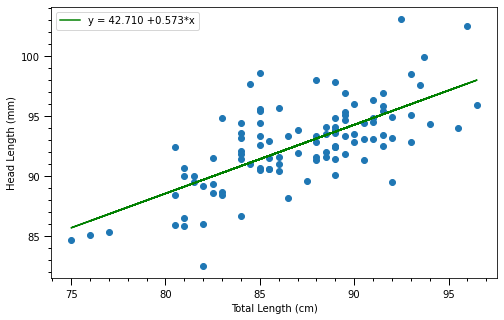

In [50]:
model = LinearRegression()
model.fit(total_l.reshape(-1, 1), head_l) #reshape needed.
weight_pre = model.predict(total_l.reshape(-1, 1)) #reshape needed.
b0, b1 = model.intercept_, model.coef_[0]
model_text = f"y = {b0:.3f} {b1:+.3f}*x"
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
ax.scatter(total_l, head_l)
ax.plot(total_l, weight_pre, color="green", label=model_text)
ax.set_xlabel("Total Length (cm)")
ax.set_ylabel("Head Length (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=3)
ax.legend(loc="upper left")

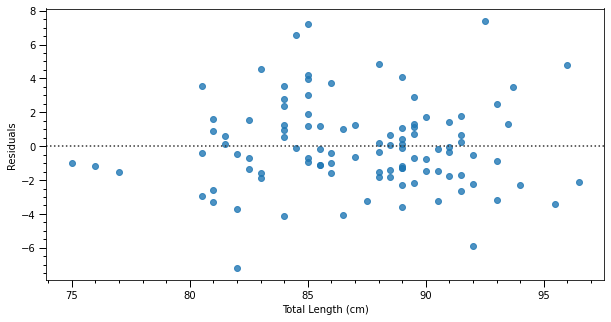

In [55]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
sns.residplot(x=total_l,y=head_l)
ax.set_xlabel("Total Length (cm)")
ax.set_ylabel("Residuals")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=3)

In [24]:
def lineer_reg(x, y):
    # y = a + bx şeklindeki model için
    # en küçük kareler yöntemiyle elde edilen kat sayı sonuçları
    n = len(x)
    # formülümüzdeki veri sayısı
    x_sum = np.sum(x)
    x2_sum = np.sum(x**2)
    y_sum = np.sum(y)
    xy_sum = np.sum(x * y)
    # bunları elde ederek formül yazımını sadeleştirmeyi amaçladık
    delta = (n * x2_sum) - (x_sum ** 2)
    a = ((x2_sum * y_sum) - (x_sum * xy_sum)) / delta
    b = ((n * xy_sum) - (x_sum * y_sum)) / delta
    y_pre = a + b * x
    # model ile verimizden tahmin oluşturduk
    dy = y - y_pre
    # model ile farkına baktık
    sigma_y = np.sqrt((np.sum(dy**2))/(n - 2))
    sigma_a = sigma_y * np.sqrt(x2_sum/delta)
    sigma_b = sigma_y * np.sqrt(n/delta)
    # hatalarını hesapladık
    return a, b, sigma_y, sigma_a, sigma_b


lineer_reg(total_l,head_l)

(42.70979314896599,
 0.572901284338252,
 2.5953219534850787,
 5.172813809858085,
 0.05932530747325851)